In [6]:
import os
import sys
import cv2
import math
import yaml
import random
import numpy as np
from pathlib import Path

# Add the root folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [7]:
import core.utils as utils
from core.transformations import Transformations

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Define the desired transformations
transformations_to_apply = utils.load_yaml_config(config_path=Path(r"/app/configs/transformations.yaml"), 
                                            key='transformations')
transformations_to_apply

[{'name': 'resize',
  'variations': [{'scale': 0.999},
   {'scale': 0.975},
   {'scale': 0.95},
   {'scale': 0.9},
   {'scale': 0.85},
   {'scale': 0.75},
   {'scale': 0.65},
   {'scale': 0.5}],
  'titles': ['scale 99.9%',
   'scale 97.5%',
   'scale 95%',
   'scale 90%',
   'scale 85%',
   'scale 75%',
   'scale 65%',
   'scale 50%']},
 {'name': 'gaussian_noise',
  'variations': [{'mean': 0, 'sigma': 2},
   {'mean': 0, 'sigma': 4},
   {'mean': 0, 'sigma': 6},
   {'mean': 0, 'sigma': 8},
   {'mean': 0, 'sigma': 10},
   {'mean': 0, 'sigma': 16},
   {'mean': 0, 'sigma': 25},
   {'mean': 0, 'sigma': 32}],
  'titles': ['Gaussian Noise: 0, 2',
   'Gaussian Noise: 0, 4',
   'Gaussian Noise: 0, 6',
   'Gaussian Noise: 0, 8',
   'Gaussian Noise: 0, 10',
   'Gaussian Noise: 0, 16',
   'Gaussian Noise: 0, 25',
   'Gaussian Noise: 0, 32']},
 {'name': 'salt_pepper_noise',
  'variations': [{'salt_prob': 0.01, 'pepper_prob': 0.3},
   {'salt_prob': 0.03, 'pepper_prob': 0.1},
   {'salt_prob': 0.1, 'pe

In [17]:
DATA_DIR = r'../data/processed/CFD/CFD_steguz/stego'
data_path = Path(DATA_DIR)

In [18]:
person_folders = [os.path.join(data_path, f) for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
person_folder = Path(random.choice(person_folders))
person_folder

PosixPath('../data/processed/CFD/CFD_steguz/stego/WM-231')

In [19]:
# instantiate the class 
transformer = Transformations()

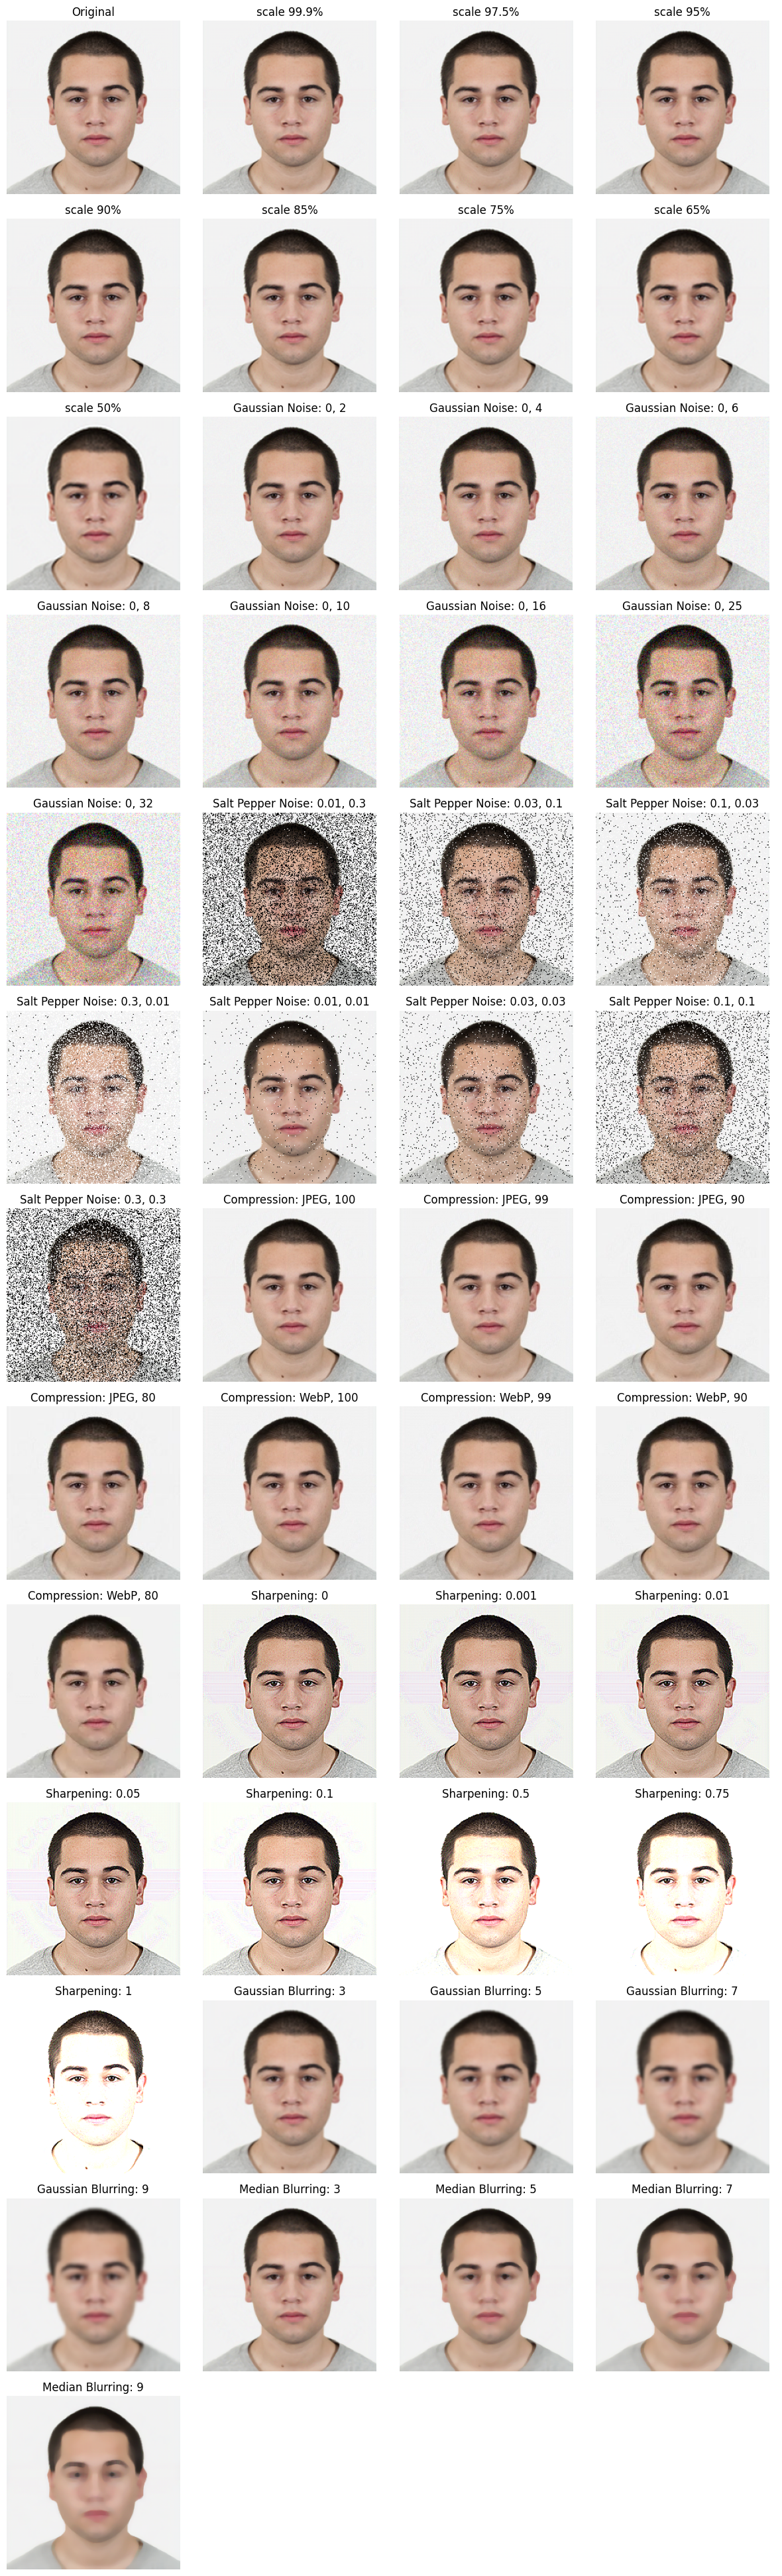

In [23]:
image_path = os.path.join(person_folder,os.listdir(person_folder)[0])
        
# Apply to only one person to check
results = utils.apply_transformations_and_display(image_path, 
                                       transformer, 
                                       transformations_to_apply)